In [1]:
%matplotlib inline
import pandas as pd 

In [2]:
balance = pd.read_csv('input/user_balance_table.csv', parse_dates=['report_date'], usecols=['report_date', 'total_purchase_amt', 'total_redeem_amt'])
balance = balance.groupby('report_date').sum()
balance['total_purchase_amt']=balance['total_purchase_amt']/balance['total_purchase_amt'].median()
balance['total_redeem_amt']=balance['total_redeem_amt']/balance['total_redeem_amt'].median()

<Axes: xlabel='report_date'>

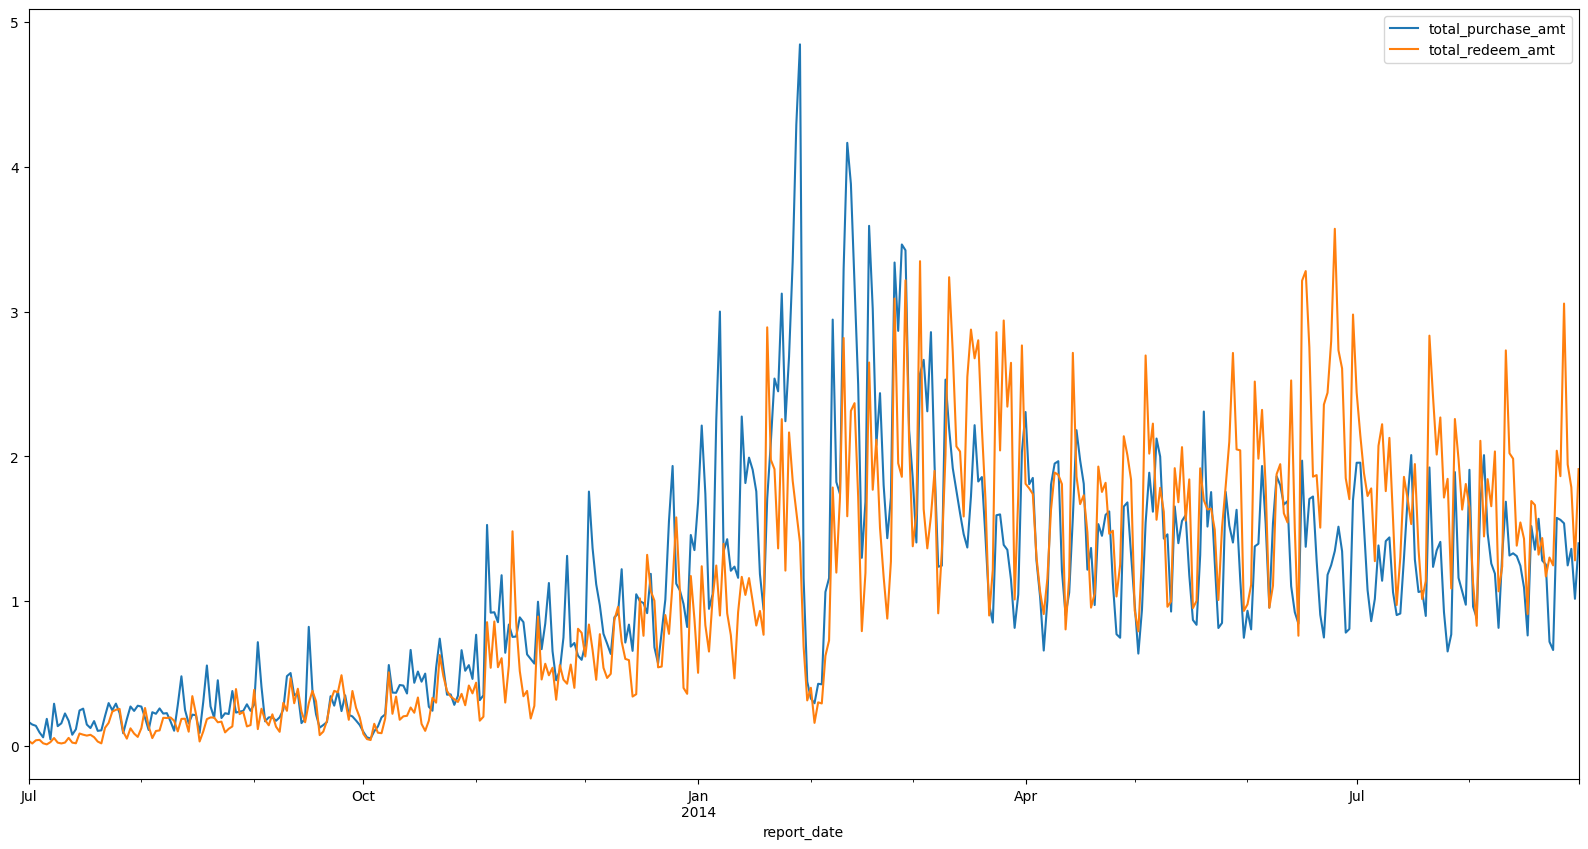

In [3]:
balance.plot(figsize=(20, 10))

In [4]:
shibor = pd.read_csv('input/mfd_bank_shibor.csv', parse_dates=['mfd_date'])
shibor = shibor.set_index('mfd_date')

<Axes: xlabel='mfd_date'>

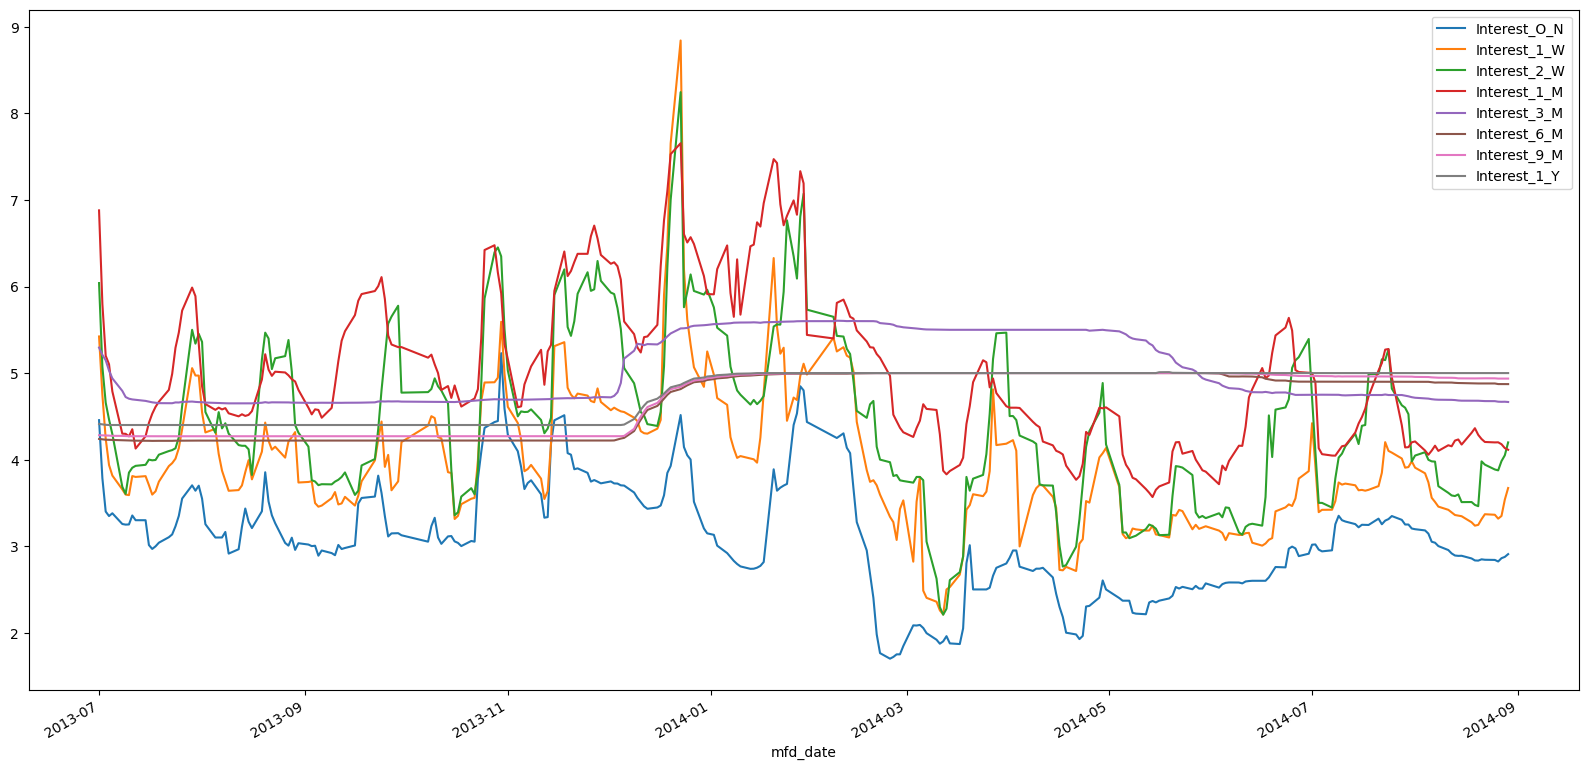

In [5]:
shibor.plot(figsize=(20, 10))

In [6]:
yields = pd.read_csv('input/mfd_day_share_interest.csv', parse_dates=['mfd_date'])
yields = yields.set_index('mfd_date')

<Axes: xlabel='mfd_date'>

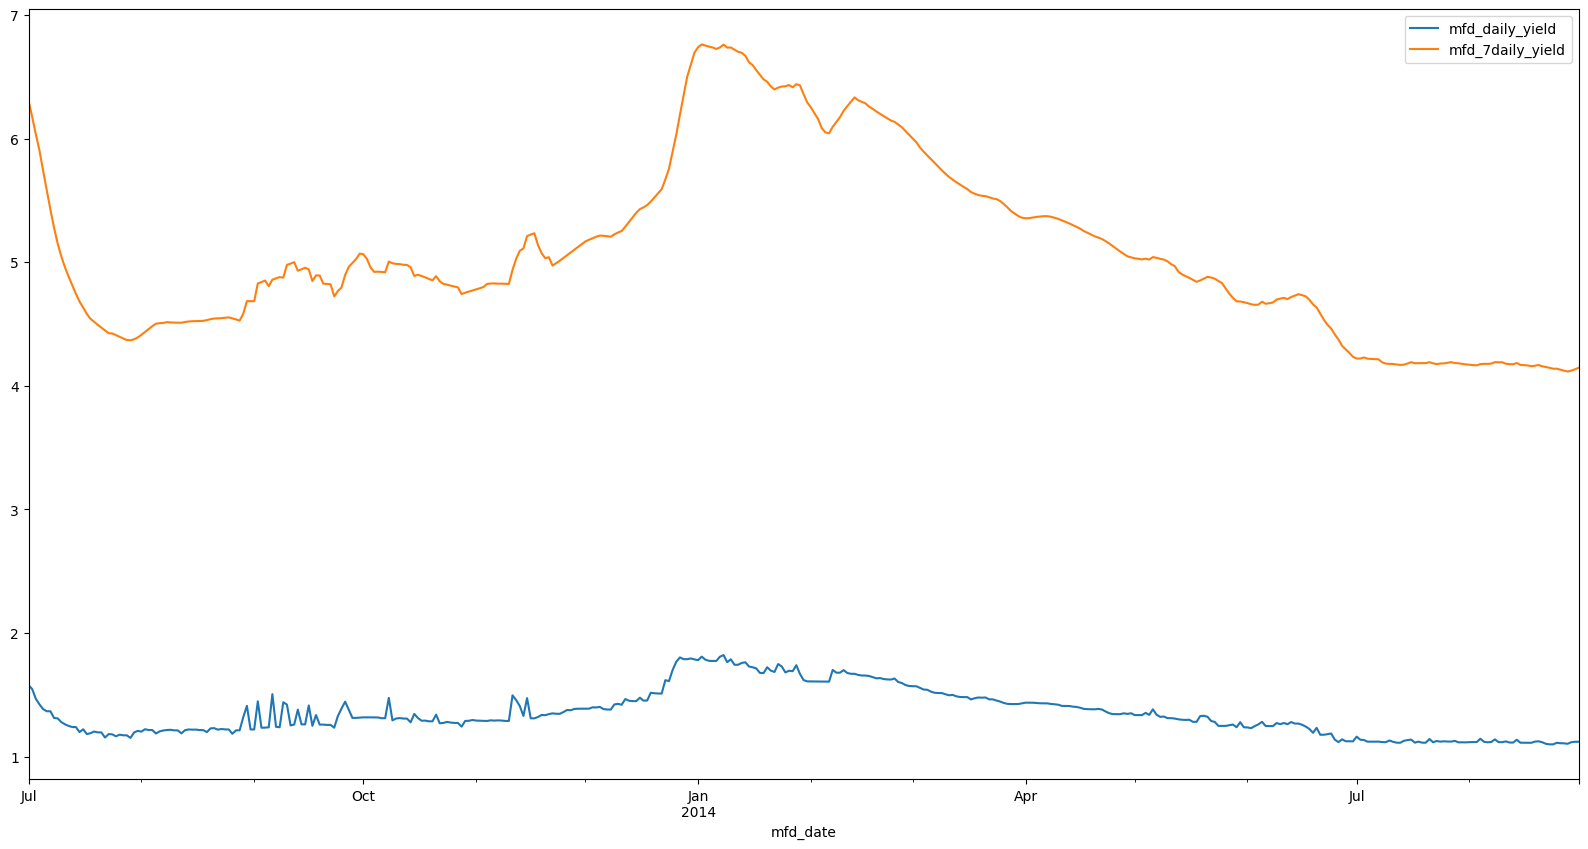

In [7]:
yields.plot(figsize=(20, 10))

In [8]:
data = pd.concat([balance, shibor, yields], axis=1 ).sort_index()


In [9]:
data.shape,balance.shape,shibor.shape, yields.shape

((427, 12), (427, 2), (294, 8), (427, 2))

In [10]:
data.isnull().sum()

total_purchase_amt      0
total_redeem_amt        0
Interest_O_N          133
Interest_1_W          133
Interest_2_W          133
Interest_1_M          133
Interest_3_M          133
Interest_6_M          133
Interest_9_M          133
Interest_1_Y          133
mfd_daily_yield         0
mfd_7daily_yield        0
dtype: int64

In [11]:
data.head()

,total_purchase_amt,total_redeem_amt,Interest_O_N,Interest_1_W,Interest_2_W,Interest_1_M,Interest_3_M,Interest_6_M,Interest_9_M,Interest_1_Y,mfd_daily_yield,mfd_7daily_yield
2013-07-01,0.165344,0.036072,4.456,5.423,6.040,6.8800,5.295,4.2390,4.2820,4.4125,1.5787,6.307
2013-07-02,0.147781,0.016678,3.786,4.750,5.074,5.8000,5.211,4.2344,4.2808,4.4070,1.5461,6.174
2013-07-03,0.138790,0.038872,3.400,4.242,4.658,5.2000,5.148,4.2300,4.2796,4.4022,1.4670,6.034
2013-07-04,0.093242,0.041854,3.348,3.938,4.464,5.1020,5.029,4.2287,4.2776,4.4000,1.4223,5.903
2013-07-05,0.059284,0.018043,3.380,3.816,4.295,4.7885,4.939,4.2273,4.2749,4.4000,1.3845,5.739


In [12]:
data.tail()

,total_purchase_amt,total_redeem_amt,Interest_O_N,Interest_1_W,Interest_2_W,Interest_1_M,Interest_3_M,Interest_6_M,Interest_9_M,Interest_1_Y,mfd_daily_yield,mfd_7daily_yield
2014-08-27,1.537966,3.056552,2.861,3.349,3.9828,4.178,4.6680,4.8729,4.9365,5.0,1.1079,4.123
2014-08-28,1.247304,1.944890,2.876,3.538,4.0500,4.133,4.6689,4.8727,4.9373,5.0,1.1043,4.116
2014-08-29,1.361671,1.787302,2.908,3.672,4.1990,4.114,4.6659,4.8726,4.9364,5.0,1.1169,4.123
2014-08-30,1.016382,1.282088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.1206,4.134
2014-08-31,1.400022,1.912567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.1204,4.146


In [13]:
data[data['Interest_O_N'].isnull()].index.map(lambda x: x.day_name()).value_counts()

Saturday     59
Sunday       57
Thursday      4
Friday        4
Monday        4
Wednesday     3
Tuesday       2
Name: count, dtype: int64

In [14]:
data = data.ffill()
data.isnull().sum()

total_purchase_amt    0
total_redeem_amt      0
Interest_O_N          0
Interest_1_W          0
Interest_2_W          0
Interest_1_M          0
Interest_3_M          0
Interest_6_M          0
Interest_9_M          0
Interest_1_Y          0
mfd_daily_yield       0
mfd_7daily_yield      0
dtype: int64

In [15]:
data.index.name='date'
data.head()

,total_purchase_amt,total_redeem_amt,Interest_O_N,Interest_1_W,Interest_2_W,Interest_1_M,Interest_3_M,Interest_6_M,Interest_9_M,Interest_1_Y,mfd_daily_yield,mfd_7daily_yield
date,,,,,,,,,,,,
2013-07-01,0.165344,0.036072,4.456,5.423,6.040,6.8800,5.295,4.2390,4.2820,4.4125,1.5787,6.307
2013-07-02,0.147781,0.016678,3.786,4.750,5.074,5.8000,5.211,4.2344,4.2808,4.4070,1.5461,6.174
2013-07-03,0.138790,0.038872,3.400,4.242,4.658,5.2000,5.148,4.2300,4.2796,4.4022,1.4670,6.034
2013-07-04,0.093242,0.041854,3.348,3.938,4.464,5.1020,5.029,4.2287,4.2776,4.4000,1.4223,5.903
2013-07-05,0.059284,0.018043,3.380,3.816,4.295,4.7885,4.939,4.2273,4.2749,4.4000,1.3845,5.739


In [16]:
data.to_csv('input/data.csv')